<a href="https://colab.research.google.com/github/mfdali/BootcampDataAnalytics/blob/main/Statistics_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Statistics with Python - Hypothesis testing
Author: Monique Dali @mfdali

Bootcamp challenge @WoMakersCode

AB Test

* Data file: experimento_teste_ab.csv

Hypothesis testing

* Data file: pacientes.csv

##  Libraries




In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# statistics
import scipy.stats as stat
# qqplot
import statsmodels.api as sm

In [ ]:
# Desativando todas as mensagens de aviso
import warnings
warnings.filterwarnings("ignore")

## Functions

In [ ]:
def plot_bars(df,hue_groups=None):

  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # create histplots
  for column in df.select_dtypes(include='object').columns:

      plt.figure(figsize=(8, 4))
      table = df[column].value_counts().sort_values(ascending=False)
      sns_plot = sns.barplot(x = table.index, y = table.values, palette='viridis', hue=hue_groups)

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.title('Frequency by ' + column)
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()

In [ ]:
def plot_count(df,hue_groups=None):

  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  list_columns = list(df.select_dtypes(include='object').columns)
  if hue_groups in list_columns: list_columns.remove(hue_groups)

  # create histplots
  for column in list_columns:

      plt.figure(figsize=(8, 4))
      #table = df[column].value_counts().sort_values(ascending=False)
      sns_plot = sns.countplot(data=df, x = column, palette='viridis', hue=hue_groups)

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.title('Frequency by ' + column)
      plt.xlabel(column)
      plt.ylabel('Frequency')
      plt.xticks(rotation=0)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()

In [ ]:
def plot_histogram(df,limits=False,hue_groups=None):
  plt.rcParams['figure.figsize'] = [4, 8]
  sns.set_theme()
  sns.set(font_scale=1.2)

  # create histplots
  for column in df.select_dtypes(include=np.number).columns:
      plt.figure(figsize=(8, 4))
      sns_plot = sns.histplot(data = df , x = column, kde= True,stat="density",hue=hue_groups, color = "darkseagreen", palette = 'viridis')

      # labels appear outside of plot area, so auto-adjust
      sns_plot.figure.tight_layout()
      plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
      plt.title("Histogram: "+column)

# AB Test

## Load data

In [ ]:
# Read the dataset into a pandas dataframe
abtest_df = pd.read_csv('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/experimento_teste_ab.csv',index_col=0)

In [ ]:
# Check dataframe
abtest_df.head()

,Versão_Página,Visualizações,Conversões
Visitante_ID,,,
1,A,167,1
2,A,160,0
3,A,170,0
4,A,161,1
5,A,104,0


## Data exploration

In [ ]:
# dataset size
abtest_df.shape

(2000, 3)

In [ ]:
# Check data type of columns
abtest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Versão_Página  2000 non-null   object
 1   Visualizações  2000 non-null   int64 
 2   Conversões     2000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 62.5+ KB


In [ ]:
# data tranformation
abtest_df['Conversões'] = abtest_df['Conversões'].astype('object')

In [ ]:
# Checking for missing values
abtest_df.isnull().sum()

Versão_Página    0
Visualizações    0
Conversões       0
dtype: int64

In [ ]:
# Summary statistics of numerical columns
abtest_df.describe()

,Visualizações
count,2000.000000
mean,150.755500
std,28.809421
min,100.000000
25%,126.000000
50%,151.000000
75%,175.000000
max,199.000000


In [ ]:
# Summary statistics of categorical columns
abtest_df.describe(include=['object'])

,Versão_Página,Conversões
count,2000,2000
unique,2,2
top,A,0
freq,1000,1770


Visualizações    Axes(0.125,0.53;0.168478x0.35)
dtype: object

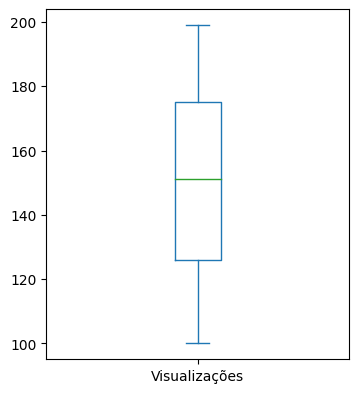

In [ ]:
# Create boxplots
abtest_df.plot(kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10))

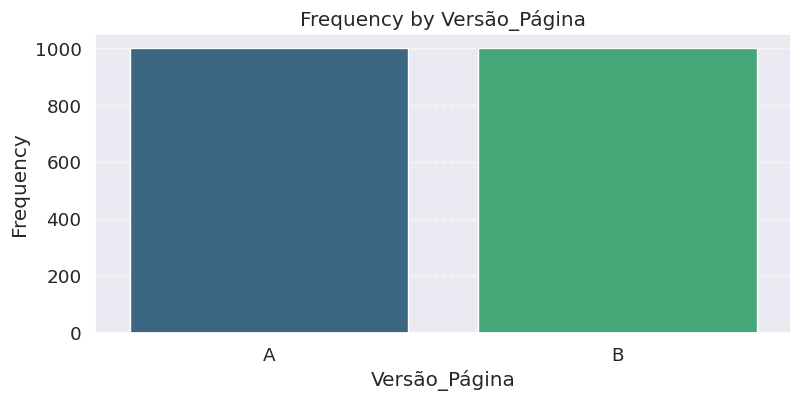

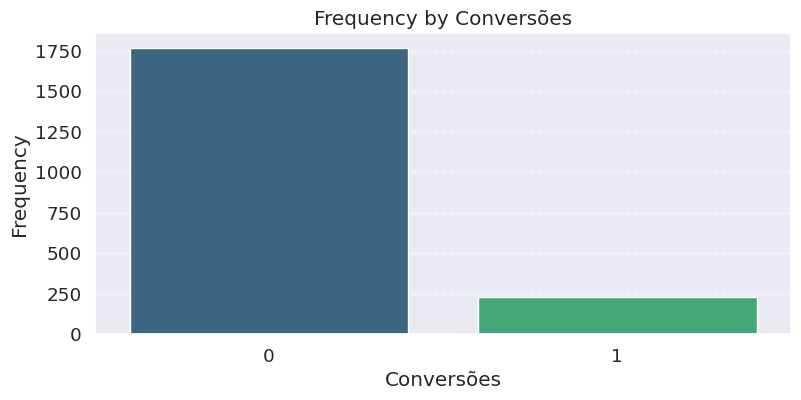

In [ ]:
plot_bars(abtest_df)

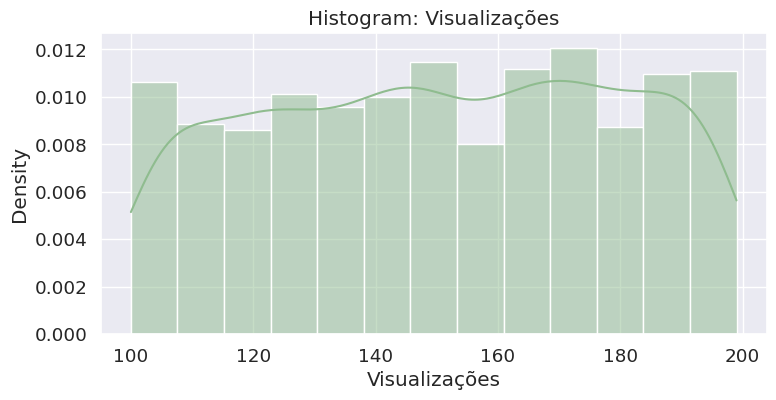

In [ ]:
# Plot histogram
plot_histogram(abtest_df)

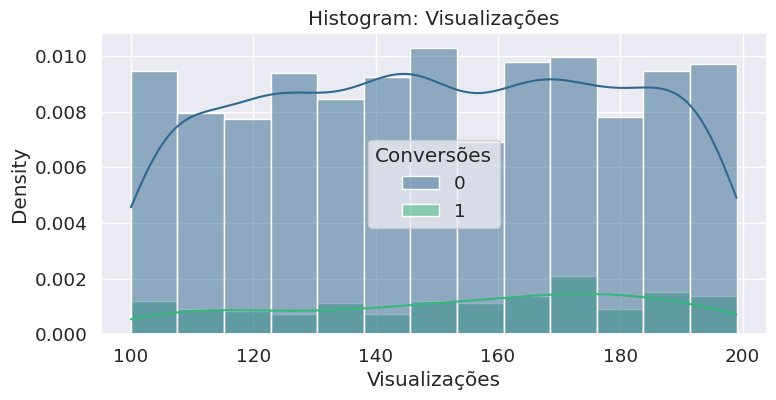

In [ ]:
# Plot histogram
plot_histogram(abtest_df,hue_groups='Conversões')

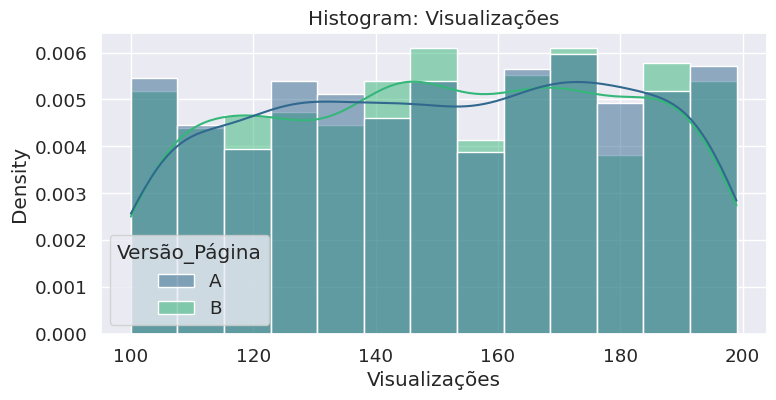

In [ ]:
# Plot histogram
plot_histogram(abtest_df,hue_groups='Versão_Página')

## Conversão

In [ ]:
# Filtrar apenas clientes convertidos
convert_abtest = abtest_df[abtest_df['Conversões']==1]

In [ ]:
# Tamanho da amostra convertida por versão do teste
pd.DataFrame(convert_abtest.groupby('Versão_Página')['Conversões'].count())

,Conversões
Versão_Página,
A,105
B,125


Quantidade de visualizações até conversão por Versão

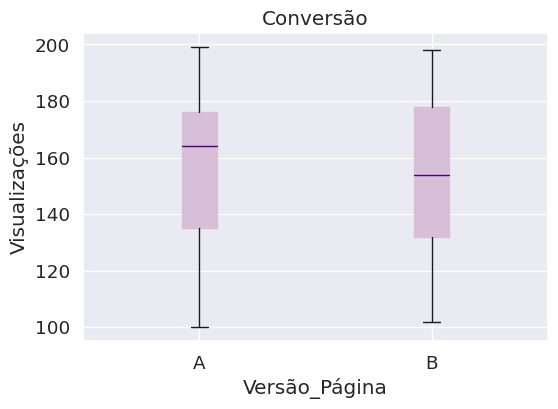

In [ ]:
# Variabilidade da durabilidade dos produtos expostos ao Sol
fig,ax = plt.subplots(figsize=(6,4))
ax = convert_abtest.plot(column=['Visualizações'],by='Versão_Página',kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10),
            color=dict(boxes='thistle', whiskers='k', medians='indigo', caps='k'), patch_artist=True, ax=ax)

# Ajustar rótulos
plt.title("Conversão")
plt.ylabel("Visualizações")
plt.xlabel('Versão_Página')

# Mudar plano de fundo para branco
plt.rcParams['axes.facecolor'] = 'white'
# Mostrar gráfico
plt.show()

In [ ]:
pd.DataFrame(convert_abtest.groupby('Versão_Página')['Visualizações'].median())

,Visualizações
Versão_Página,
A,164.0
B,154.0


In [ ]:
pd.DataFrame(convert_abtest.groupby('Versão_Página')['Visualizações'].mean())

,Visualizações
Versão_Página,
A,156.019048
B,153.144000


Pelo boxplot nota-se que a mediana de visualizações até a conversão da versão B da página é menor. O cálculo mostra que em média é necessário mais visualizações para a conversão pela versão A da página.

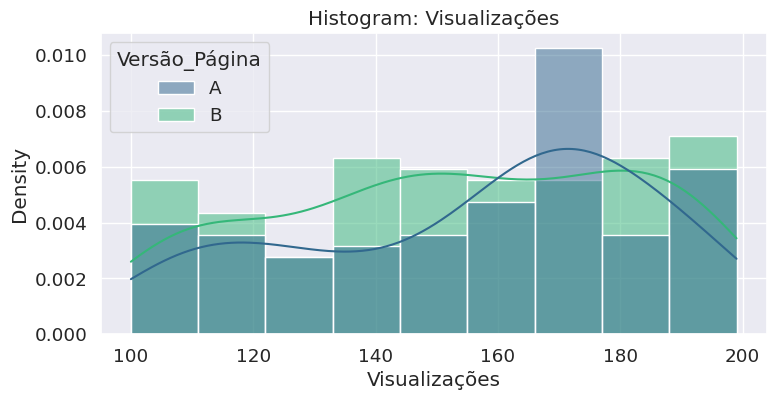

In [ ]:
# Plot histogram
plot_histogram(convert_abtest,hue_groups='Versão_Página')

1. Which of the scenarios has the highest conversion rate?

conversion_rate (%) = (conversions/visualizations)*100

In [ ]:
# Sum total of visualizations and conversions by page version
rate_df = pd.DataFrame(abtest_df.groupby('Versão_Página')[['Visualizações','Conversões']].sum())

In [ ]:
# Calculate conversion rate in another column
rate_df['rate'] = (rate_df['Conversões']/rate_df['Visualizações'])*100

In [ ]:
# Show created table
rate_df

,Visualizações,Conversões,rate
Versão_Página,,,
A,150835,105,0.069612
B,150676,125,0.082959


In [ ]:
print("Conversion rate of page version:\n A %.4f %%\n B %.4f %%\n"%(rate_df['rate'][0],rate_df['rate'][1]))
rate_df['rate'].max()
print("Conversion rate of page version %s is higher\n" % (rate_df.loc[rate_df['rate']==rate_df['rate'].max()].index[0]))

Conversion rate of page version:
 A 0.0696 %
 B 0.0830 %

Conversion rate of page version B is higher



2. Calculate the sample size needed for the development of an A/B test, following these criteria:

a. Scenario A, the base, as the initial one, which currently works.

b. Consider 95% confidence that the effect on conversion was not random with a significance level of 5% (alpha = 0.05).

c. Also consider an 80% chance of capturing the effect of the new approach.

d. The increase to 10% conversion.

Equation:

Margin of Error (EM) = $\frac{Z(\alpha/2).\sigma^{'}}{\sqrt n}$

Sample size (n) = $ (\frac{Z . \sigma^{'}}{EM})^2 $


In [ ]:
#control group A

# level of significance
alpha = 0.05
# chance of capturing test effect
beta = 1-0.80
# increase in conversion
target = 0.10

In [ ]:
# calculate z(a/2) for alpha = 5%
z = stat.norm.ppf(1-alpha/2)

In [ ]:
# calculate z(a/2) for alpha = 5%
z_beta = stat.norm.ppf(1-beta)

In [ ]:
# sample variance control group
var_A = abtest_df[abtest_df['Versão_Página']=="A"]['Conversões'].var()

In [ ]:
#Diference between target and current conversion
delta = target- rate_df['rate']['A']

In [ ]:
# calculate sample size
n = (2*var_A*pow((z+z_beta),2))/pow(delta,2)

In [ ]:
print("Required sample size : %i\n" % round(n))

Required sample size : 1599



# Hypothesis testing

## Load data

In [ ]:
# Read the dataset into a pandas dataframe
patients_df = pd.read_csv('https://raw.githubusercontent.com/mfdali/BootcampDataAnalytics/main/data/pacientes.csv',index_col=0)

In [ ]:
# Check dataframe
patients_df.head()

,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


## Data exploration

In [ ]:
# dataset size
patients_df.shape

(1000, 8)

In [ ]:
# Check data type of columns
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pressao_Arterial   1000 non-null   float64
 1   Idade              1000 non-null   int64  
 2   Genero             1000 non-null   int64  
 3   Etnia              1000 non-null   int64  
 4   Estado_Saude       1000 non-null   int64  
 5   Nome_Genero        1000 non-null   object 
 6   Nome_Etnia         1000 non-null   object 
 7   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 70.3+ KB


In [ ]:
# data transformation
patients_df['Genero'] = patients_df['Genero'].astype('object')
patients_df['Etnia'] = patients_df['Etnia'].astype('object')
patients_df['Estado_Saude'] = patients_df['Estado_Saude'].astype('object')

In [ ]:
# Checking for missing values
patients_df.isnull().sum()

Pressao_Arterial     0
Idade                0
Genero               0
Etnia                0
Estado_Saude         0
Nome_Genero          0
Nome_Etnia           0
Nome_Estado_Saude    0
dtype: int64

In [ ]:
# Summary statistics of numerical columns
patients_df.describe()

,Pressao_Arterial,Idade
count,1000.000000,1000.000000
mean,150.375623,49.757000
std,9.943613,11.682998
min,112.929821,30.000000
25%,144.240948,40.000000
50%,150.455624,49.000000
75%,156.792113,60.000000
max,181.803131,70.000000


In [ ]:
# Summary statistics of categorical columns
patients_df.describe(include=['object'])

,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
count,1000,1000,1000,1000,1000,1000
unique,2,4,2,2,4,2
top,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
freq,503,260,510,503,260,510


Pressao_Arterial       Axes(0.125,0.53;0.168478x0.35)
Idade               Axes(0.327174,0.53;0.168478x0.35)
dtype: object

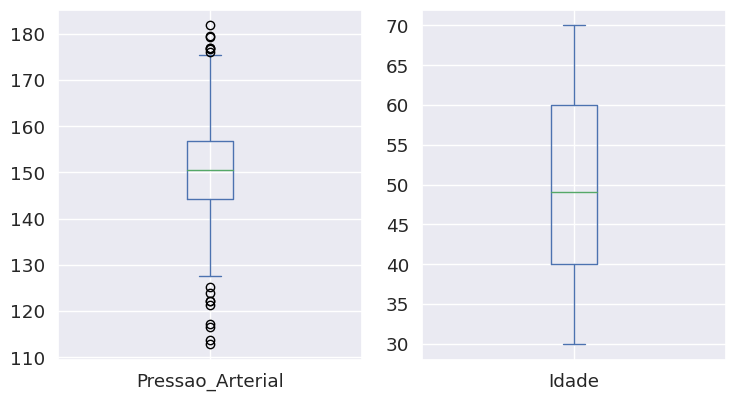

In [ ]:
# Create boxplots
patients_df.plot(kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10))

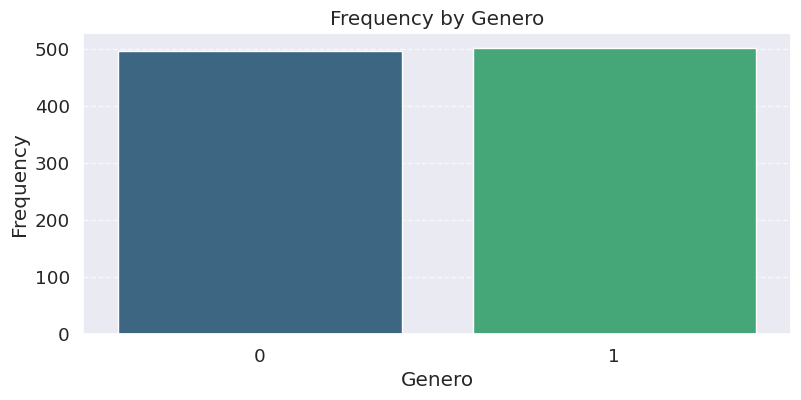

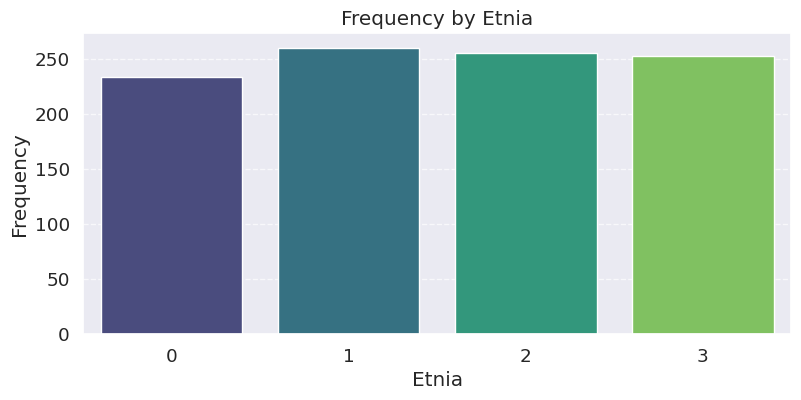

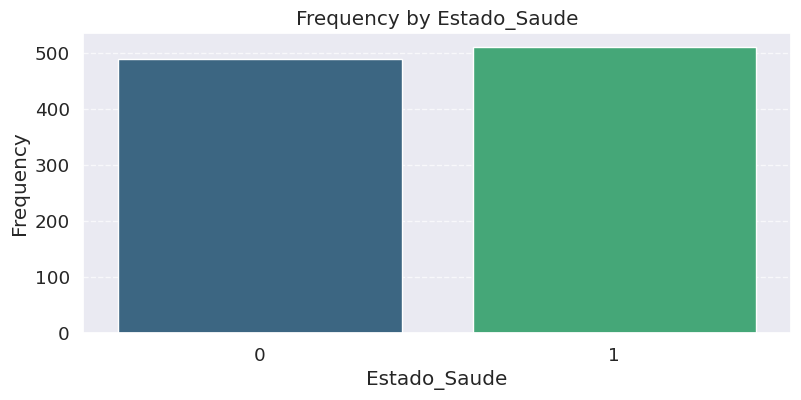

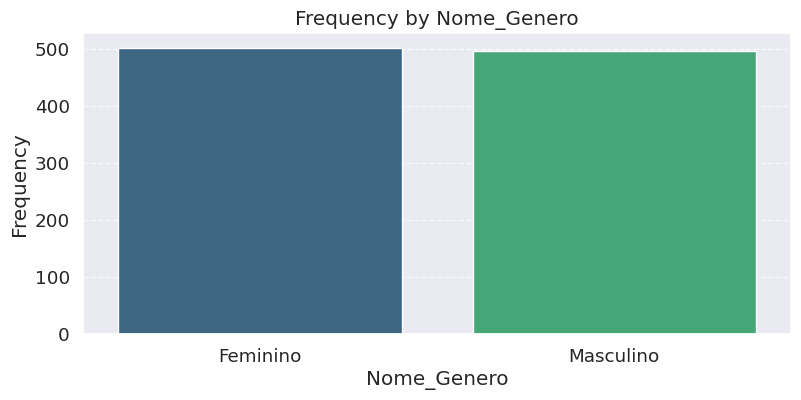

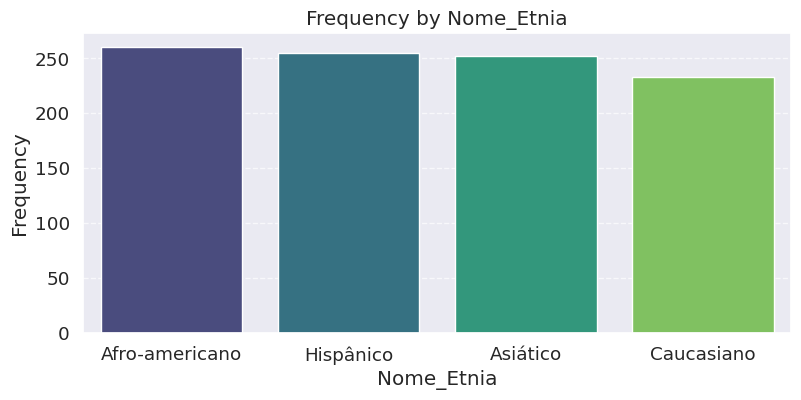

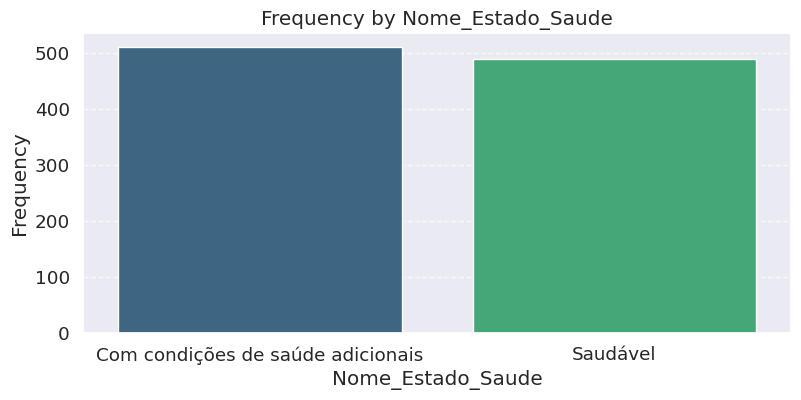

In [ ]:
plot_bars(patients_df)

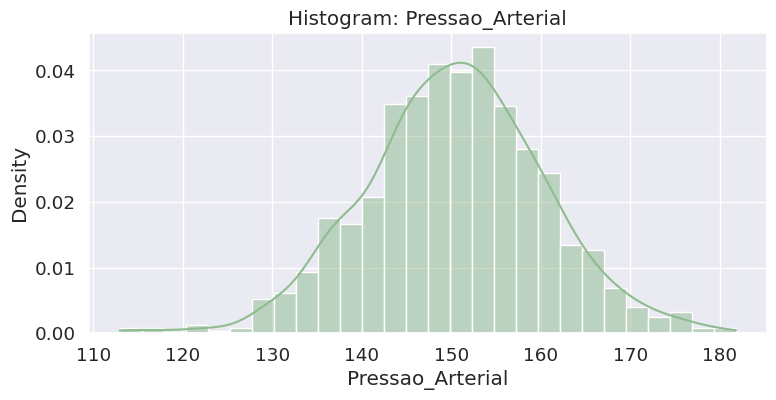

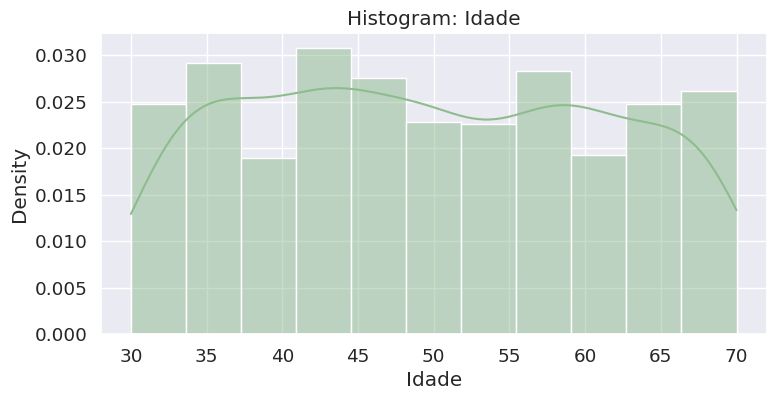

In [ ]:
# Plot histogram
plot_histogram(patients_df)

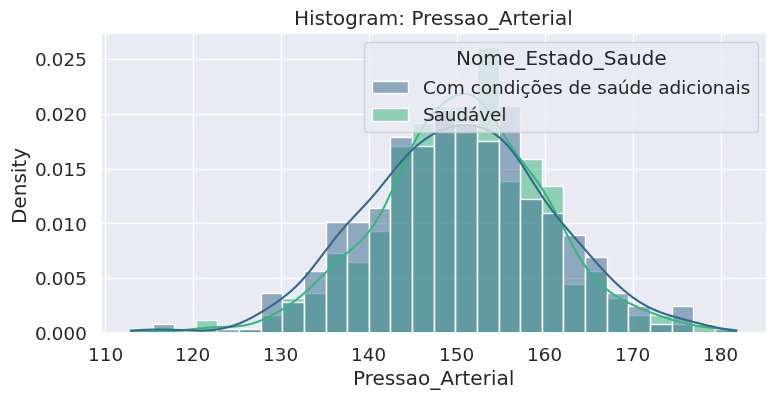

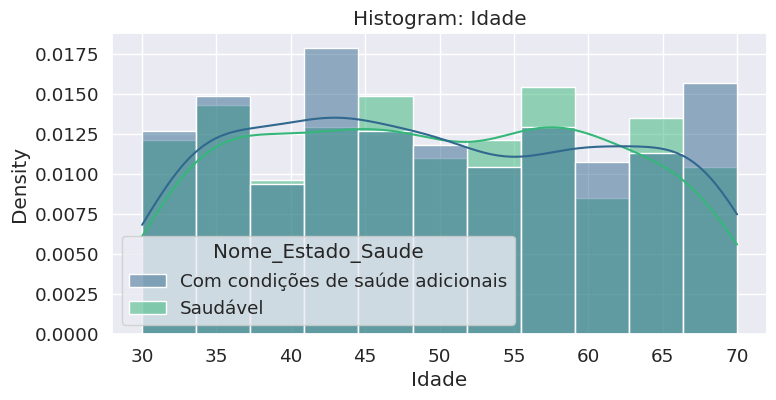

In [ ]:
# Plot histogram
plot_histogram(patients_df,hue_groups='Nome_Estado_Saude')

## Questions

3. Considering a sample of 45 numbers representing the data frame index, indices = ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967,
699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
146, 505, 273, 957, 362]). Considering this sample, is it possible to say that the average age of people with heart problems is over 50 years old? Significance level equal to 5%.

H0: average age of people with heart problems > 50

H1: average age of people with heart problems < 50

In [ ]:
sub_sample_50_index = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]

In [ ]:
sub_sample_50_index.sort()

In [ ]:
print(sub_sample_50_index)

[36, 39, 84, 89, 89, 146, 184, 209, 217, 222, 224, 232, 255, 269, 273, 280, 311, 348, 358, 362, 381, 400, 402, 439, 473, 505, 558, 639, 677, 697, 699, 715, 726, 751, 756, 757, 768, 769, 793, 883, 895, 907, 909, 957, 967]


In [ ]:
alpha = 0.05

In [ ]:
sub_sample_50 = patients_df.loc[sub_sample_50_index]

In [ ]:
# Calculate the T-test for the mean of ONE group of scores
a, p_value = stat.ttest_1samp(sub_sample_50['Idade'],50)

In [ ]:
if p_value < alpha:
  print("Reject H0. P-value < alpha\n P-value = %.2f\n" % p_value)
else:
  print("Do not reject H0. P-value > alpha\n P-value = %.2f\n" % p_value)

Do not reject H0. P-value > alpha
 P-value = 0.96



Average age of people with heart problems is over 50

4. We want to understand what type of sample we are dealing with if we divide the sets into 2, one with people who have additional health conditions and the other with healthy people. Would it be dependent or independent?

In [ ]:
# split dataset into 2 groups: with additional health conditions and the other with healthy people
sub_sample_health_without = patients_df[patients_df['Estado_Saude']==0]['Pressao_Arterial'] # Healthy
sub_sample_health_with = patients_df[patients_df['Estado_Saude']==1]['Pressao_Arterial'] # Additional conditions

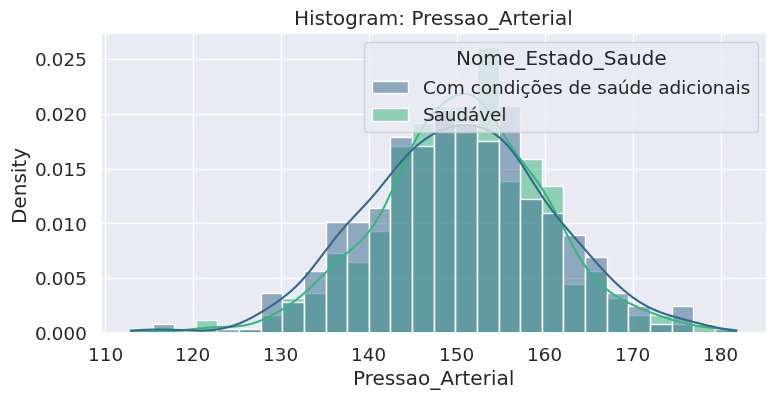

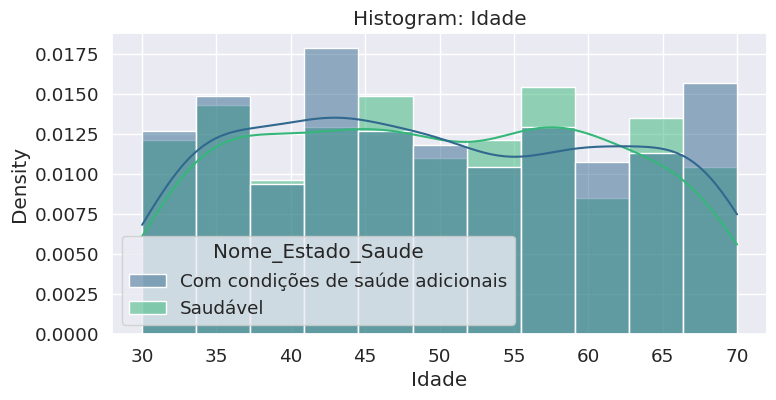

In [ ]:
# Histogram
plot_histogram(patients_df,hue_groups=patients_df['Nome_Estado_Saude'])

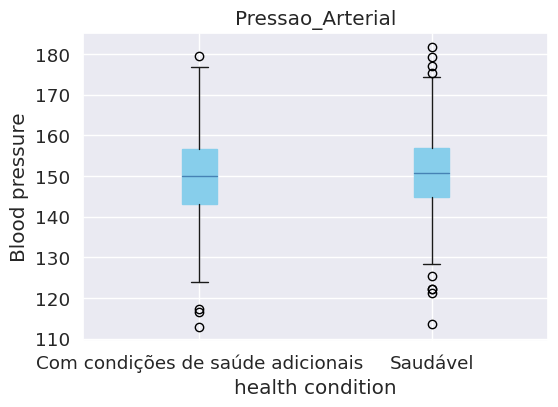

In [ ]:
# Boxplot
fig,ax = plt.subplots(figsize=(6,4))
ax = patients_df.plot(column=['Pressao_Arterial'],by='Nome_Estado_Saude',kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10),
            color=dict(boxes='skyblue', whiskers='k', medians='steelblue', caps='k'), patch_artist=True, ax=ax)

# Ajustar rótulos
plt.ylabel("Blood pressure")
plt.xlabel("health condition")

# Mudar plano de fundo para branco
plt.rcParams['axes.facecolor'] = 'white'
# Mostrar gráfico
plt.show()

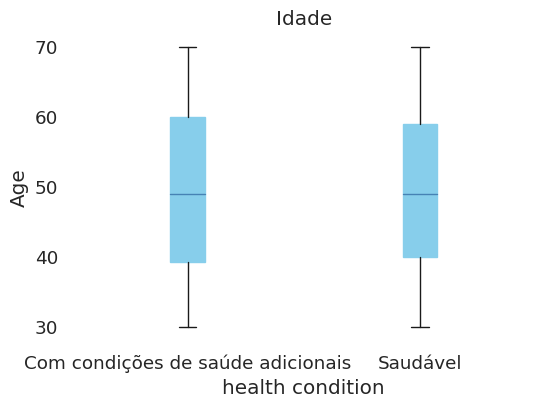

In [ ]:
# Boxplot
fig,ax = plt.subplots(figsize=(6,4))
ax = patients_df.plot(column=['Idade'],by='Nome_Estado_Saude',kind = 'box', subplots = True, layout = (2,4), sharex = False, sharey = False, figsize = (18,10),
            color=dict(boxes='skyblue', whiskers='k', medians='steelblue', caps='k'), patch_artist=True, ax=ax)

# Ajustar rótulos
plt.ylabel("Age")
plt.xlabel("health condition")

# Mudar plano de fundo para branco
plt.rcParams['axes.facecolor'] = 'white'
# Mostrar gráfico
plt.show()

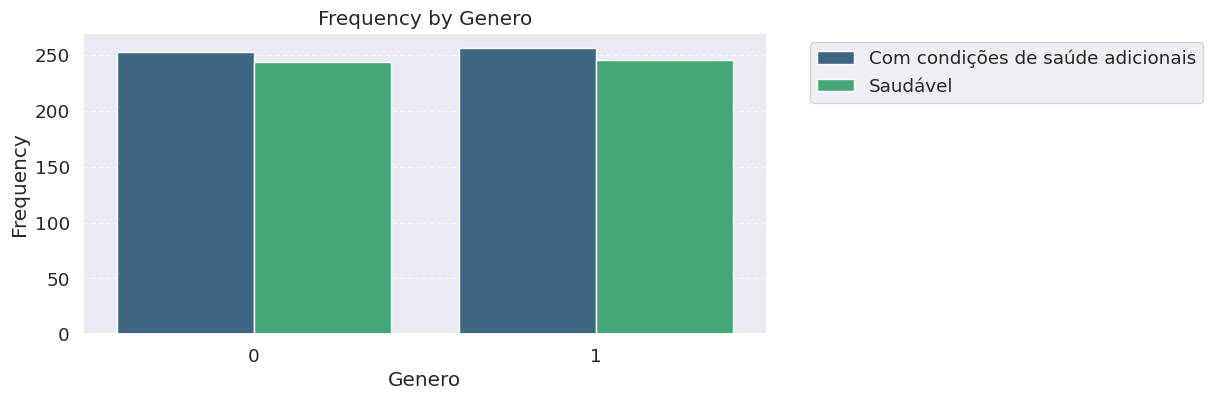

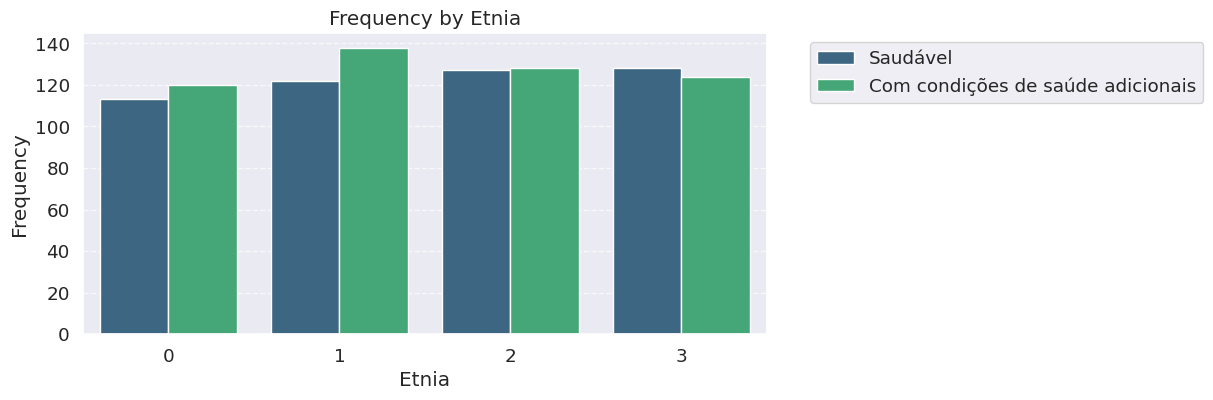

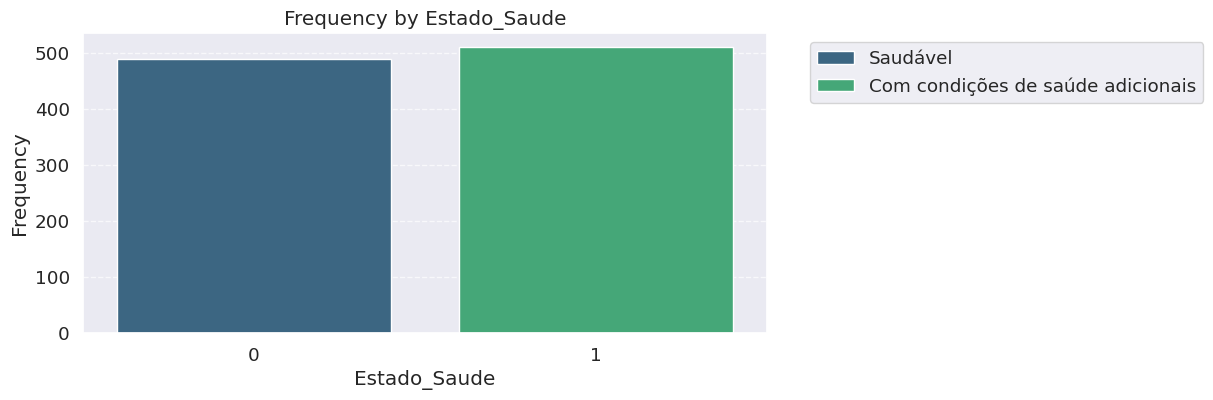

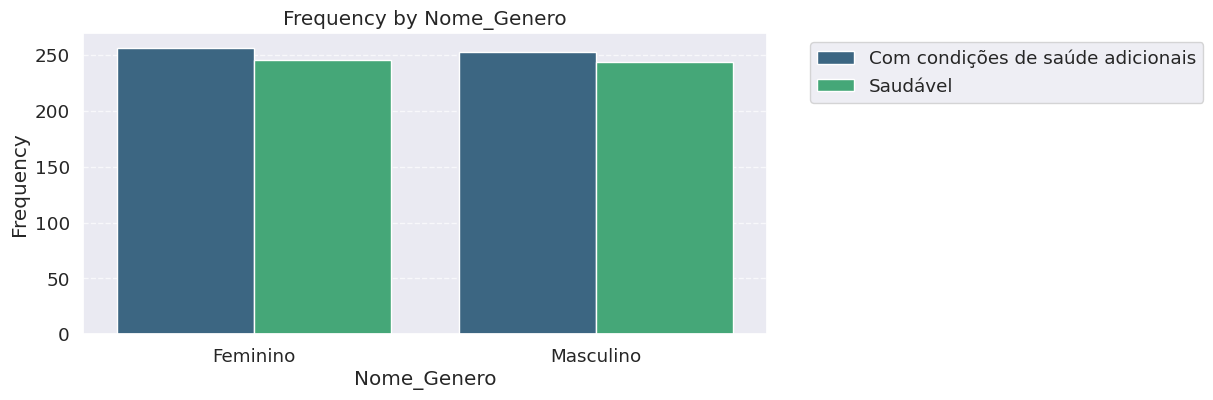

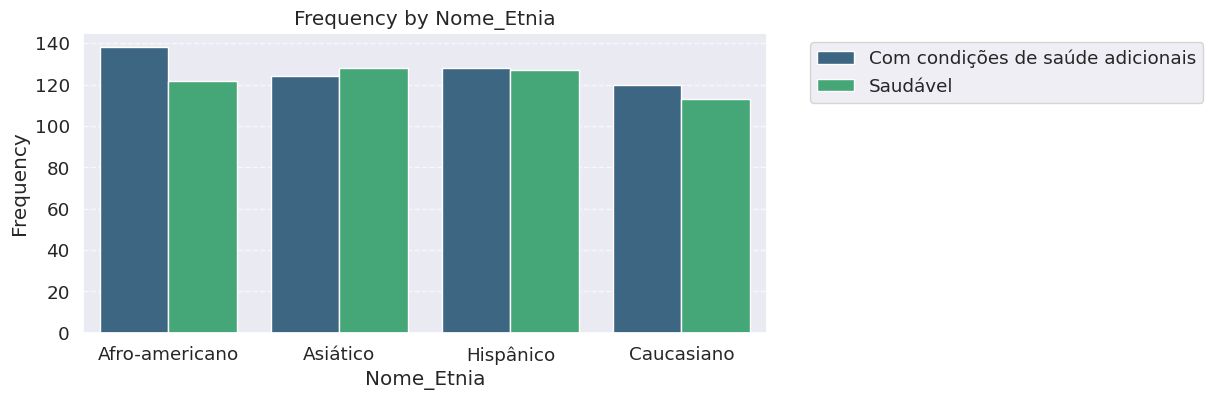

In [ ]:
plot_count(patients_df,'Nome_Estado_Saude')

5. Now consider a set of random people representing the index of the dataframe, indexes = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693 , 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), we can say that the mean arterial pressure for patients with additional health conditions is the same as the mean arterial pressure for patients without additional health conditions ? Consider the significance level at 6%

H0: mean arterial pressure for patients WITH additional health conditions = mean arterial pressure for patients WITHOUT additional health conditions

H1: mean arterial pressure for patients WITH additional health conditions <> mean arterial pressure for patients WITHOUT additional health conditions

In [ ]:
# level of significance
alpha = 0.06

In [ ]:
sub_sample_health_index = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

In [ ]:
sub_sample_health = patients_df.loc[sub_sample_health_index]

In [ ]:
sub_sample_health_with = sub_sample_health[sub_sample_health['Estado_Saude']==1]
sub_sample_health_without = sub_sample_health[sub_sample_health['Estado_Saude']==0]

In [ ]:
# Calculate the T-test for the means of two independent samples of scores.
t_statistic, p_value = stat.ttest_ind(sub_sample_health_with['Pressao_Arterial'],sub_sample_health_without['Pressao_Arterial'])

In [ ]:
if p_value < alpha:
  print("Reject H0. P-value < alpha\n P-value = %.2f\n" % p_value)
else:
  print("Do not reject H0. P-value > alpha\n P-value = %.2f\n" % p_value)

Mean arterial pressure for patients WITH additional health conditions is the same for patients WITHOUT additional health conditions

6. Is there a significant difference in mean arterial pressure between different ethnic groups in this population? (alpha is 5%)

H0: Mean arterial pressure = all ethnic groups.

H1: Mean blood pressure <> at least two ethnic groups
in this population.

In [ ]:
# level of significance
alpha = 0.05

In [ ]:
sample_ethnic_0 = patients_df[patients_df['Etnia']==0]['Pressao_Arterial']
sample_ethnic_1 = patients_df[patients_df['Etnia']==1]['Pressao_Arterial']
sample_ethnic_2 = patients_df[patients_df['Etnia']==2]['Pressao_Arterial']
sample_ethnic_3 = patients_df[patients_df['Etnia']==3]['Pressao_Arterial']

In [ ]:
# Calculate one-way ANOVA
anova_stat, p_value = stat.f_oneway(sample_ethnic_0,sample_ethnic_1,sample_ethnic_2,sample_ethnic_3)

In [ ]:
if p_value < alpha:
  print("Reject H0. P-value < alpha\n P-value = %.2f\n" % p_value)
else:
  print("Do not reject H0. P-value > alpha\n P-value = %.2f\n" % p_value)

Mean arterial pressure is the same in all ethnic groups

7. Lúcia is a researcher and aims to understand the gender relationship in this group of patients. It is believed that there is a relationship between sex and additional health conditions.

H0: There is a relationship between sex and additional health conditions
H1: There is NOT a relationship between sex and additional health conditions

In [ ]:
sample_health_with_F = patients_df[(patients_df['Nome_Genero']=='Feminino') & (patients_df['Nome_Estado_Saude']=='Saudável')].count()[0]
sample_health_with_M = patients_df[(patients_df['Nome_Genero']=='Masculino') & (patients_df['Nome_Estado_Saude']=='Saudável')].count()[0]
sample_health_without_F = patients_df[(patients_df['Nome_Genero']=='Feminino') & (patients_df['Nome_Estado_Saude']!='Saudável')].count()[0]
sample_health_without_M = patients_df[(patients_df['Nome_Genero']=='Masculino') & (patients_df['Nome_Estado_Saude']!='Saudável')].count()[0]

In [ ]:
#Chi-square test of independence of variables in a contingency table
chi_stats = stat.chi2_contingency([[sample_health_with_F,sample_health_without_F],[sample_health_with_M,sample_health_without_M]])

In [ ]:
p_value = chi_stats.pvalue

In [ ]:
if p_value < alpha:
  print("Reject H0. P-value < alpha\n P-value = %.2f\n" % p_value)
else:
  print("Do not reject H0. P-value > alpha\n P-value = %.2f\n" % p_value)

There is a relationship between sex and additional health conditions

8. Is there an association between patients' age and their blood pressure?

H0: blood pressure is independent of age

H1: blood pressure is associated with age

In [ ]:
# contingency table
contingency_table = [patients_df['Idade'], patients_df['Pressao_Arterial']]

In [ ]:
# Chi-square test of independence of variables in a contingency table
chi_stats = stat.chi2_contingency(contingency_table)

In [ ]:
# Get p-value
p_value = chi_stats.pvalue

In [ ]:
#Print result
if p_value < alpha:
  print("Reject H0. P-value < alpha\n P-value = %.2f\n" % p_value)
else:
  print("Do not reject H0. P-value > alpha\n P-value = %.2f\n" % p_value)

Blood pressure is associated with age

9. What is the confidence interval for mean blood pressure among patients with additional health conditions? (confidence level 95%)

In [ ]:
confidence_level = 0.95

In [ ]:
sample_health_with = patients_df[patients_df['Estado_Saude']==1]

In [ ]:
mean_pressure = sample_health_with['Pressao_Arterial'].mean()
std_pressure = sample_health_with['Pressao_Arterial'].std()

In [ ]:
n = len(sample_health_with)

In [ ]:
print("sub-sample size: %d\n" % n)

Normal distribution

In [ ]:
# Critical value for a two-tailed test at 95% confidence level
z = stat.norm.ppf((1+confidence_level)/2)

In [ ]:
# Margin of error
health_with_CI = z*(std_pressure/np.sqrt(n))

In [ ]:
# Calculate confidence interval
lower_limit = mean_pressure - health_with_CI
upper_limit = mean_pressure + health_with_CI

In [ ]:
print("Confidence interval (95%%): (%.2f,%.2f)\n" % (lower_limit,upper_limit))

10. Does the distribution of blood pressure in the population follow a normal distribution?

H0: The distribution of blood pressure in the population = normal distribution.

H1: The distribution of blood pressure in the population <> normal distribution.

In [ ]:
# Extract blood pressure
pressure_list = patients_df['Pressao_Arterial'].values

In [ ]:
# Plot histogram
fig,ax = plt.subplots(figsize=(6,4))
ax = sns.distplot(pressure_list)

In [ ]:
# Plot a QQ plot to visually assess normality
fig,ax = plt.subplots(figsize=(6,4))
sm.qqplot(pressure_list, ax=ax)
plt.title('QQ Plot - Blood Pressure')
plt.show()

In [ ]:
# Perform the Kolmogorov-Smirnov test for normality
ks_stats = stat.kstest(pressure_list, cdf='norm')

In [ ]:
# Get p-value
p_value = ks_stats.pvalue

In [ ]:
#Print result
if p_value < alpha:
  print("Reject H0. P-value < alpha\n P-value = %.2f\n" % p_value)
else:
  print("Do not reject H0. P-value > alpha\n P-value = %.2f\n" % p_value)

Blood pressure distribution does not follow a normal distribution